#### Loading Data

In [ ]:
#import pandas
import pandas as pd
# load dataset
pima = pd.read_csv("./data/Logistic-Regression/pima-indians-diabetes-database/diabetes.csv")

In [ ]:
pima.head()

#### Null Values

In [ ]:
pima.isnull().sum()

#### Selecting Feature

In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

#### Splitting Data

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### Model Development and Prediction

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

#### Model Evaluation using Confusion Matrix

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#### Visualizing Confusion Matrix using Heatmap

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Confusion Matrix Evaluation Metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')
print("Precision:",metrics.precision_score(y_test, y_pred)*100,'%')
print("Recall:",metrics.recall_score(y_test, y_pred)*100,'%')

#### ROC Curve

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM

#### Data Set Information:

#### Import Libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Dala Loading
bankdata = pd.read_csv("./data/SVM/bill_authentication.csv")  

#### Exploratory Data Analysis

In [3]:
bankdata.shape 

(1372, 5)

In [4]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### Data Preprocessing

In [5]:
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class'] 

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

#### Training the Algorithm

In [7]:
from sklearn.svm import SVC  

In [8]:
svclassifier = SVC(kernel='linear')

In [9]:
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Prediction

In [10]:
y_pred = svclassifier.predict(X_test)

#### Evaluating the Algorithm

In [11]:
from sklearn.metrics import classification_report, confusion_matrix 

In [12]:
confusion_matrix(y_test,y_pred)

array([[151,   3],
       [  0, 121]], dtype=int64)

#### Classification Report

In [13]:
print(classification_report(y_test,y_pred))  

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       154
          1       0.98      1.00      0.99       121

avg / total       0.99      0.99      0.99       275



#### Kernel SVM

#### Implementing Kernel SVM with Scikit-Learn

In [14]:
# Importing Libraries
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

#### Importing the Dataset

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames) 

#### Preprocessing

In [16]:
X = irisdata.drop('Class', axis=1)  
y = irisdata['Class']

#### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split  

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#### Training the Algorithm

##### 1. Polynomial Kernel

In [19]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=8)  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
# Making Predictions
y_pred = svclassifier.predict(X_test)

#### Evaluating the Algorithm

In [21]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))   

[[15  0  0]
 [ 0  9  0]
 [ 0  2  4]]


In [22]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.67      0.80         6

    avg / total       0.95      0.93      0.93        30



##### 2. Gaussian Kernel

In [23]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
y_pred = svclassifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  

[[15  0  0]
 [ 0  9  0]
 [ 0  0  6]]


In [26]:
print(classification_report(y_test, y_pred))  

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30



##### 3. Sigmoid Kernel

In [27]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_pred = svclassifier.predict(X_test)  

In [29]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))   

[[ 0  0 15]
 [ 0  0  9]
 [ 0  0  6]]


In [30]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        15
Iris-versicolor       0.00      0.00      0.00         9
 Iris-virginica       0.20      1.00      0.33         6

    avg / total       0.04      0.20      0.07        30



C:\Users\IIIT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest Classifier to predict the Breast cancer type (Benign or Malignant)

In [32]:
# Required Python Packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [33]:
data=pd.read_csv('./data/Random-Forest/breast-cancer-wisconsin.csv')

In [34]:
data

,CodeNumber,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,CancerType
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [35]:
data.isnull().sum()

CodeNumber                  0
ClumpThickness              0
UniformityCellSize          0
UniformityCellShape         0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
CancerType                  0
dtype: int64

In [36]:
data.BareNuclei.unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [37]:
data = data[data.BareNuclei != '?']

In [38]:
X = data.drop('CancerType', axis=1)  
y = data['CancerType']

In [39]:
from sklearn.model_selection import train_test_split  

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [41]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
y_pred = clf.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  

[[90  3]
 [ 2 42]]


In [44]:
print(classification_report(y_test, y_pred))  

             precision    recall  f1-score   support

          2       0.98      0.97      0.97        93
          4       0.93      0.95      0.94        44

avg / total       0.96      0.96      0.96       137



# SGD Classifier

In [45]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

In [46]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)

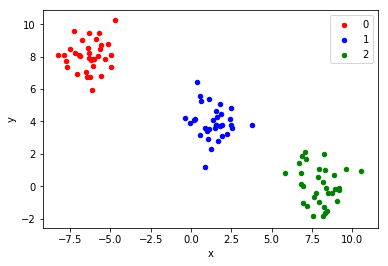

In [47]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [48]:
df

,x,y,label
0,7.752758,-0.410580,2
1,1.116427,5.383324,1
2,9.044145,-0.890575,2
3,8.163579,-1.809922,2
4,0.363728,6.416577,1
5,10.551061,0.964192,2
6,1.779701,5.084910,1
7,3.812707,3.758199,1
8,-6.304034,9.491995,0
9,1.800734,3.705359,1


In [49]:
features=df.drop('label',axis=1)
target=df.label

In [50]:
from sklearn.model_selection import train_test_split  

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20)

In [52]:
from sklearn.linear_model import SGDClassifier

In [53]:
clf = SGDClassifier()
clf.fit(X_train, y_train) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [54]:
y_pred=clf.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred)) 

[[6 0 0]
 [5 0 2]
 [0 0 7]]


In [56]:
print(classification_report(y_test, y_pred))  

             precision    recall  f1-score   support

          0       0.55      1.00      0.71         6
          1       0.00      0.00      0.00         7
          2       0.78      1.00      0.88         7

avg / total       0.44      0.65      0.52        20



C:\Users\IIIT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### parameter tuning

In [57]:
clf = SGDClassifier(penalty="l2", max_iter=5)
clf.fit(X_train, y_train) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [58]:
y_pred=clf.predict(X_test) 

In [59]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       1.00      1.00      1.00         7
          2       1.00      1.00      1.00         7

avg / total       1.00      1.00      1.00        20



# Naive Bayes

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Gaussian naive Bayes classifier
from sklearn.preprocessing import LabelEncoder
sns.set(style="white", color_codes=True)

In [61]:
train_df = pd.read_csv("./data/Naive-bayes/train.csv", dtype={"Age": np.float64})
test_df = pd.read_csv("./data/Naive-bayes/test.csv", dtype={"Age": np.float64})

In [62]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [64]:
train_df = train_df.drop(['Ticket', 'Cabin','Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Name', 'PassengerId'], axis=1)

## Imputation

In [65]:
from sklearn.preprocessing import Imputer

In [66]:
# creating an object of imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)

In [67]:
imputer=imputer.fit(test_df.loc[:, ['Fare']])

In [ ]:
# now we need to convert the test into new. in order to do this, we need to transform the imputer

In [68]:
test_df.loc[:, ['Fare']]=imputer.transform(test_df.loc[:, ['Fare']])

In [69]:
train_df = train_df[pd.notnull(train_df['Embarked'])]

In [70]:
full_data=[train_df,test_df]

In [71]:
for dataset in full_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5)

print (train_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.513274
1   (16.0, 32.0]  0.351648
2   (32.0, 48.0]  0.380165
3   (48.0, 64.0]  0.426471
4   (64.0, 80.0]  0.090909


C:\Users\IIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [72]:
for dataset in full_data:
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']  

In [73]:
train_df.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
CategoricalAge    0
dtype: int64

In [74]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [75]:
# Encoding the catagorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_X=LabelEncoder()
train_df.loc[:, ['Sex']]=labelEncoder_X.fit_transform(train_df.loc[:, ['Sex']])
test_df.loc[:, ['Sex']]=labelEncoder_X.fit_transform(test_df.loc[:, ['Sex']])

C:\Users\IIIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\IIIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
train_df.loc[:, ['Embarked']]=labelEncoder_X.fit_transform(train_df.loc[:, ['Embarked']])
test_df.loc[:, ['Embarked']]=labelEncoder_X.fit_transform(test_df.loc[:, ['Embarked']])

C:\Users\IIIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\IIIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### One Hot Encoding

In [77]:
# Get one hot encoding of column embarked for training,testing data
trainEmbarkedencoder = pd.get_dummies(train_df['Embarked'])
testEmbarkedencoder= pd.get_dummies(test_df['Embarked'])
# Drop columns embarked as they are now encoded
train_df = train_df.drop('Embarked',axis = 1)
test_df = test_df.drop('Embarked',axis = 1)
# Join the encoded dataframe
train_df = train_df.join(trainEmbarkedencoder)
test_df = test_df.join(testEmbarkedencoder)
train_df 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CategoricalAge,0,1,2
0,0,3,1,1,1,0,7.2500,"(16.0, 32.0]",0,0,1
1,1,1,0,2,1,0,71.2833,"(32.0, 48.0]",1,0,0
2,1,3,0,1,0,0,7.9250,"(16.0, 32.0]",0,0,1
3,1,1,0,2,1,0,53.1000,"(32.0, 48.0]",0,0,1
4,0,3,1,2,0,0,8.0500,"(32.0, 48.0]",0,0,1
5,0,3,1,1,0,0,8.4583,"(16.0, 32.0]",0,1,0
6,0,1,1,3,0,0,51.8625,"(48.0, 64.0]",0,0,1
7,0,3,1,0,3,1,21.0750,"(-0.08, 16.0]",0,0,1
8,1,3,0,1,0,2,11.1333,"(16.0, 32.0]",0,0,1
9,1,2,0,0,1,0,30.0708,"(-0.08, 16.0]",1,0,0


In [78]:
from sklearn.preprocessing import OneHotEncoder

In [79]:
onehot_encoder = OneHotEncoder(sparse=False)
train_OneHotEncoded = onehot_encoder.fit_transform(train_df.loc[:, ['Sex']])
test_OneHotEncoded = onehot_encoder.fit_transform(test_df.loc[:, ['Sex']])

In [80]:
train_df["Male"] = train_OneHotEncoded[:,0]
train_df["Felame"] = train_OneHotEncoded[:,1]
test_df["Male"] = test_OneHotEncoded[:,0]
test_df["Felame"] = test_OneHotEncoded[:,1]

In [81]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CategoricalAge,0,1,2,Male,Felame
0,0,3,1,1,1,0,7.2500,"(16.0, 32.0]",0,0,1,0.0,1.0
1,1,1,0,2,1,0,71.2833,"(32.0, 48.0]",1,0,0,1.0,0.0
2,1,3,0,1,0,0,7.9250,"(16.0, 32.0]",0,0,1,1.0,0.0
3,1,1,0,2,1,0,53.1000,"(32.0, 48.0]",0,0,1,1.0,0.0
4,0,3,1,2,0,0,8.0500,"(32.0, 48.0]",0,0,1,0.0,1.0
5,0,3,1,1,0,0,8.4583,"(16.0, 32.0]",0,1,0,0.0,1.0
6,0,1,1,3,0,0,51.8625,"(48.0, 64.0]",0,0,1,0.0,1.0
7,0,3,1,0,3,1,21.0750,"(-0.08, 16.0]",0,0,1,0.0,1.0
8,1,3,0,1,0,2,11.1333,"(16.0, 32.0]",0,0,1,1.0,0.0
9,1,2,0,0,1,0,30.0708,"(-0.08, 16.0]",1,0,0,1.0,0.0


In [82]:
X = train_df.drop(['Survived','CategoricalAge'], axis=1)  
y = train_df['Survived']

In [83]:
from sklearn.model_selection import train_test_split  

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
# Gaussian Naive Bayes

gaussian = GaussianNB()

In [87]:
gaussian.fit(X_train, y_train)

GaussianNB(priors=None)

In [88]:
y_pred = gaussian.predict(X_test)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  

[[91 19]
 [23 45]]


In [90]:
print(classification_report(y_test, y_pred))  

             precision    recall  f1-score   support

          0       0.80      0.83      0.81       110
          1       0.70      0.66      0.68        68

avg / total       0.76      0.76      0.76       178



# KNN

In [91]:
import pandas as pd

In [92]:
#read in the data using pandas
df =pd.read_csv("./data/KNN/pima-indians-diabetes-database/diabetes.csv")

In [93]:
#check data has been read in properly
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['Outcome'])

#check that the target variable has been removed
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [95]:
#separate target values
y = df['Outcome'].values

#view target values
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [96]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [98]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [99]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6688311688311688

### k-Fold Cross-Validation

In [100]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
cv_scores mean:0.7135557253204311


### Hypertuning model parameters using GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 14}

In [103]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7578125